Suppose you work as a Data Analyst at Uber; You need to provide answers to all the questions given below to the company.

1. In which category do people book the Uber rides most?
2. For which purpose do people book the Uber rides most?
3. At what time people books cabs the most from Uber?
4. In which months do people book Uber rides less frequently?
5. On which days of the week do people book Uber rides the  most?
6. How many miles do people ussually book a cab for through Uber?

In [2]:
import pandas as pd

In [1]:
import numpy as    np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset =    pd.read_csv("UberDataset.csv")

In [4]:
dataset.shape

(1156, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
dataset.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [77]:
dataset[dataset.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [78]:
dataset.drop_duplicates(inplace=True)

Data Preprocessing

In [79]:
dataset['PURPOSE'].fillna("NOT",    inplace =    True)

In [80]:
dataset.dropna(inplace=True)

In [81]:
dataset.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1154 non-null   object 
 1   END_DATE    1154 non-null   object 
 2   CATEGORY    1154 non-null   object 
 3   START       1154 non-null   object 
 4   STOP        1154 non-null   object 
 5   MILES       1154 non-null   float64
 6   PURPOSE     1154 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


In [83]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [84]:
# dataset['START_DATE']    =    pd.to_datetime(dataset['START_DATE'],    errors =    'coerce') 
# dataset['END_DATE']    =    pd.to_datetime(dataset['END_DATE'],    errors =    'coerce')
dataset['START_DATE']    =    pd.to_datetime(dataset['START_DATE']) 
dataset['END_DATE']    =    pd.to_datetime(dataset['END_DATE'])

In [85]:
dataset.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   END_DATE    1154 non-null   datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1154 non-null   float64       
 6   PURPOSE     1154 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.1+ KB


In [87]:
from    datetime import    datetime
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date 
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

In [88]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14


In [ ]:
dataset['day-night'] = pd.cut(x=dataset['time'],bins =  [0,10,15,19,24],right=False,labels =['Morning','Afternoon','Evening','Night'])

In [90]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon


In [91]:
dataset.shape

(1154, 10)

In [92]:
dataset.isna().sum()

START_DATE     0
END_DATE       0
CATEGORY       0
START          0
STOP           0
MILES          0
PURPOSE        0
date           0
time           0
day-night     19
dtype: int64

In [98]:
dataset[dataset.isna().any(axis=1)]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
27,2016-01-15 00:41:00,2016-01-15 01:01:00,Business,Morrisville,Cary,8.0,Errand/Supplies,2016-01-15,0,NaN
103,2016-02-14 00:50:00,2016-02-14 01:00:00,Personal,Jackson Heights,East Elmhurst,1.8,NOT,2016-02-14,0,NaN
231,2016-03-17 00:33:00,2016-03-17 00:44:00,Personal,Downtown,The Drag,1.7,NOT,2016-03-17,0,NaN
274,2016-03-27 00:31:00,2016-03-27 00:40:00,Business,Lake Reams,Lake Reams,2.1,Errand/Supplies,2016-03-27,0,NaN
301,2016-04-06 00:19:00,2016-04-06 00:39:00,Business,Wayne Ridge,Whitebridge,8.0,Meal/Entertain,2016-04-06,0,NaN
386,2016-05-28 00:15:00,2016-05-28 00:21:00,Business,Kilarney Woods,Whitebridge,4.7,Errand/Supplies,2016-05-28,0,NaN
454,2016-06-18 00:29:00,2016-06-18 00:51:00,Business,Morrisville,Cary,8.7,NOT,2016-06-18,0,NaN
489,2016-06-28 00:48:00,2016-06-28 01:05:00,Business,Morrisville,Cary,8.2,Customer Visit,2016-06-28,0,NaN
500,2016-07-01 00:00:00,2016-07-01 00:25:00,Business,Durham,Cary,9.9,Meeting,2016-07-01,0,NaN
507,2016-07-03 00:28:00,2016-07-03 00:38:00,Business,Cary,Morrisville,3.1,Errand/Supplies,2016-07-03,0,NaN


In [99]:
dataset.dropna(inplace=True)

In [101]:
dataset.shape

(1135, 10)

Data Visualizations

e:\Users\Nihala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count', ylabel='PURPOSE'>

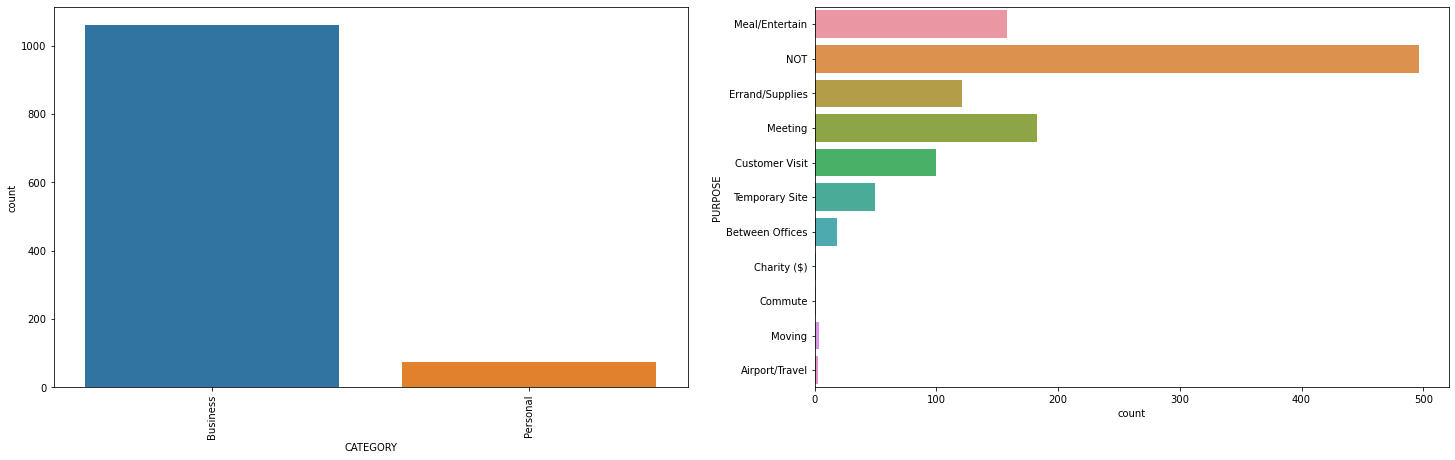

In [112]:
plt.figure(figsize =(25,7)) 
plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY']) 
plt.xticks(rotation =90)
plt.subplot(1,2,2)
sns.countplot(y=dataset['PURPOSE'])
# purpose=dataset['PURPOSE'].value_counts()
# sns.barplot(y=purpose.index,x=purpose)

<AxesSubplot:xlabel='day-night', ylabel='count'>

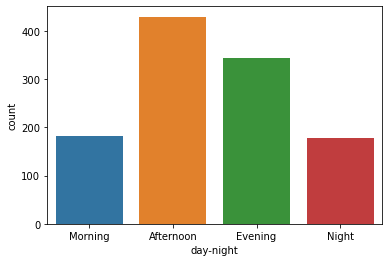

In [114]:
sns.countplot(x=dataset['day-night'])

In [115]:
dataset['MONTH']  =  pd.DatetimeIndex(dataset['START_DATE']).month

month_label =   {1.0:'Jan', 2.0:'Feb',3.0 :'Mar', 4.0:'April',
5.0:  'May',  6.0: 'June', 7.0: 'July',  8.0:  'Aug',
9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}


In [116]:
dataset["MONTH"] = dataset.MONTH.map(month_label) 
#dataset["MONTH"] = dataset['MONTH'].map(month_label) 

In [117]:
mon = dataset.MONTH.value_counts(sort=False)
mon

Jan       60
Feb      114
Mar      111
April     53
May       48
June     105
July     105
Aug      133
Sep       36
Oct      104
Nov      122
Dec      144
Name: MONTH, dtype: int64

In [118]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Jan


In [119]:
df =    pd.DataFrame({
"No. of rides":    mon.values,
"Max miles":    dataset.groupby('MONTH', sort=False)['MILES'].max()        # Har mo 
})
df

,No. of rides,Max miles
MONTH,,
Jan,60,63.7
Feb,114,43.7
Mar,111,310.3
April,53,174.2
May,48,25.6
June,105,46.9
July,105,195.3
Aug,133,156.9
Sep,36,195.6


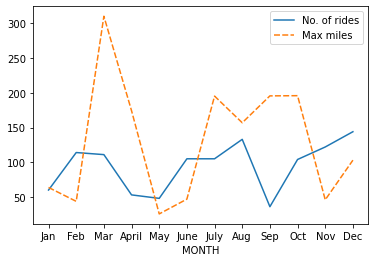

In [120]:
p =  sns.lineplot(data=df)   

In [121]:
dataset['DAY']    = dataset.START_DATE.dt.weekday 
day_label =    {0: 'Mon', 1:'Tues', 2:'Wed',3:'Thur',4:'Fri', 5:'Sat', 6:'Sun'} 
dataset['DAY']    =    dataset['DAY'].map(day_label)

In [122]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Jan,Wed


<AxesSubplot:xlabel='DAY', ylabel='count'>

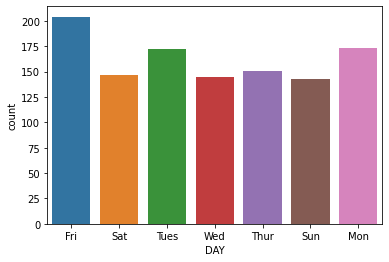

In [132]:
sns.countplot(x=dataset['DAY'])

#inorder to get sorted bar plots lets go with finding value counts of DAY column and then barplot on it.

In [124]:
day_label =dataset.DAY.value_counts()

In [125]:
day_label

Fri     204
Mon     173
Tues    172
Thur    151
Sat     147
Wed     145
Sun     143
Name: DAY, dtype: int64

Text(0, 0.5, 'COUNT')

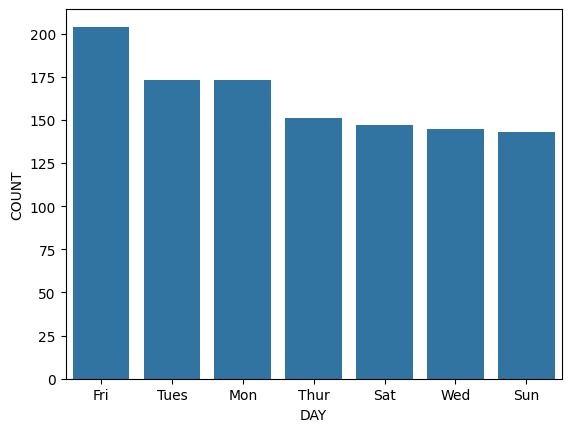

In [50]:
sns.barplot(x=day_label.index, y= day_label) 
plt.xlabel('DAY')
plt.ylabel('COUNT')

In [ ]:
#sns.countplot(dataset['DAY'])

In [62]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


<AxesSubplot:ylabel='MILES'>

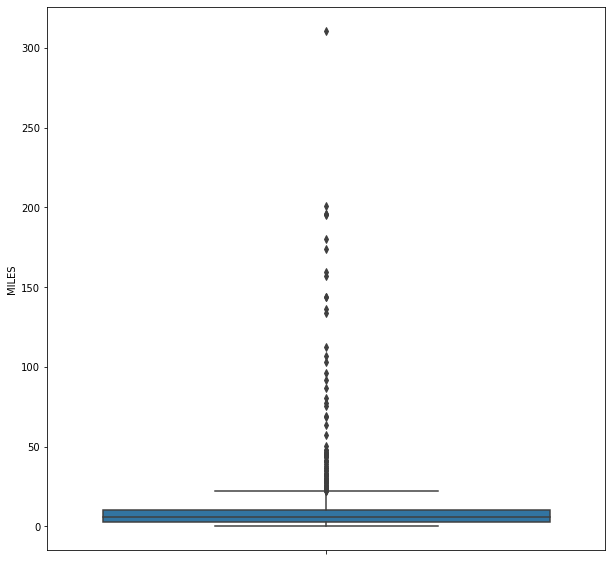

In [151]:
plt.figure(figsize=(10,10))
sns.boxplot(y=dataset['MILES'])

<AxesSubplot:ylabel='MILES'>

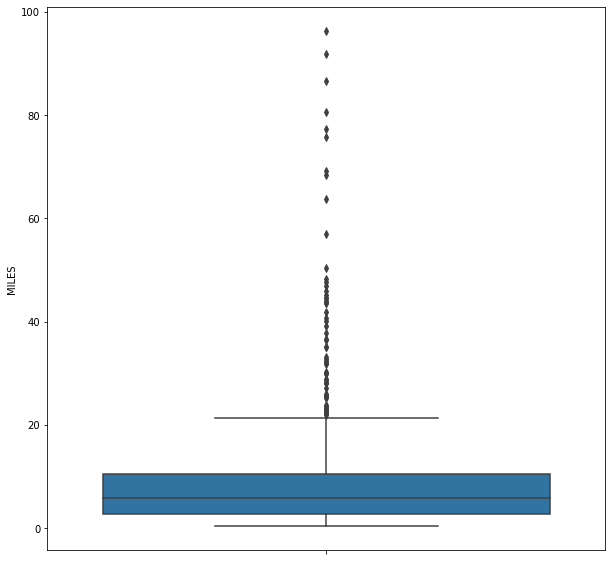

In [150]:
plt.figure(figsize=(10,10))
sns.boxplot(y=dataset[dataset['MILES']<100]['MILES'])

<AxesSubplot:ylabel='MILES'>

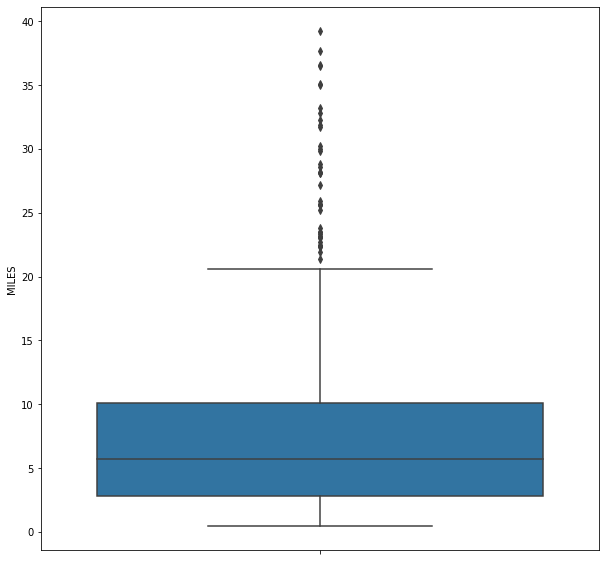

In [149]:
plt.figure(figsize=(10,10))
sns.boxplot(y=dataset[dataset['MILES']<40]['MILES'])

<AxesSubplot:xlabel='MILES', ylabel='Count'>

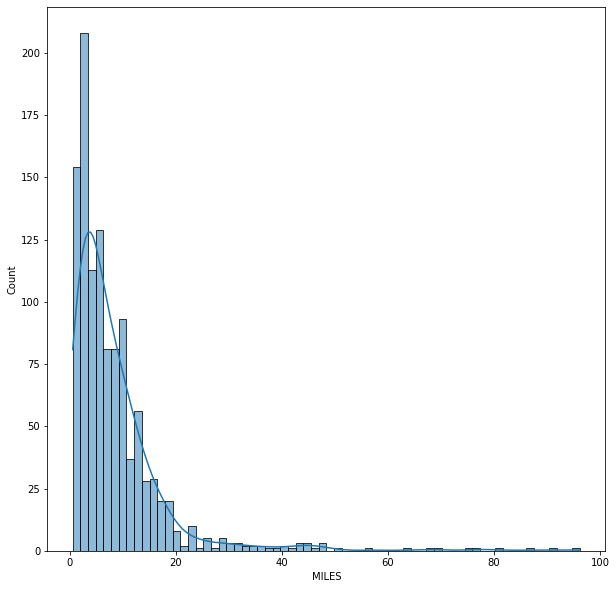

In [148]:
plt.figure(figsize=(10,10))
sns.histplot(dataset[dataset['MILES']<100]['MILES'],kde=True)